## Melbourne Housing Data Analysis

In this notebook, we will analyze the Melbourne housing dataset. We'll start by importing the necessary libraries, reading the data, and then performing some data preprocessing steps.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import mstats

In [2]:
# Reading the dataset
df = pd.read_csv('..\Raw_Data\Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Dropping unnecessary columns
columns_to_drop = ["Address", 
                   "Method", 
                   "SellerG", 
                   "Bedroom2", 
                   "BuildingArea", 
                   "YearBuilt", 
                   "CouncilArea", 
                  ]
df.drop(columns_to_drop, axis=1, inplace=True)

In [14]:
# Renaming columns for clarity
df.rename(columns={"Landsize": "Land Size", "Regionname": "Region", "Propertycount": "Property Count"}, inplace=True)

In [15]:
# Handling missing values
df.dropna(inplace=True)

In [16]:
# Checking for duplicates and removing them
df.drop_duplicates(inplace=True)

In [17]:
# Changing the format of the 'Date' column and extracting the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.drop(['Date'], axis=1, inplace=True)

KeyError: 'Date'

In [18]:
# Displaying the cleaned dataframe
df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Land Size,Lattitude,Longtitude,Region,Property Count,Year
1,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0,2016
2,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0,2016
4,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0,2017
5,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0,2017
6,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0,2016


In [10]:
# Save DataFrame as csv
df.to_csv('../Cleaned_Data/Cleaned_Data_with_Suburb.csv', index = False)

In [11]:
# Data overview
shape = df.shape
column_names = df.columns.tolist()
basic_statistics = df.describe(include='all')

shape, column_names, basic_statistics.head()

((17678, 14),
 ['Suburb',
  'Rooms',
  'Type',
  'Price',
  'Distance',
  'Postcode',
  'Bathroom',
  'Car',
  'Landsize',
  'Lattitude',
  'Longtitude',
  'Region',
  'Propertycount',
  'Year'],
            Suburb         Rooms   Type         Price      Distance  \
 count       17678  17678.000000  17678  1.767800e+04  17678.000000   
 unique        333           NaN      3           NaN           NaN   
 top     Reservoir           NaN      h           NaN           NaN   
 freq          431           NaN  13339           NaN           NaN   
 mean          NaN      3.053852    NaN  1.094995e+06     11.153304   
 
             Postcode      Bathroom           Car      Landsize     Lattitude  \
 count   17678.000000  17678.000000  17678.000000  17678.000000  17678.000000   
 unique           NaN           NaN           NaN           NaN           NaN   
 top              NaN           NaN           NaN           NaN           NaN   
 freq             NaN           NaN           NaN   

In [12]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

Suburb           0
Rooms            0
Type             0
Price            0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Region           0
Propertycount    0
Year             0
dtype: int64

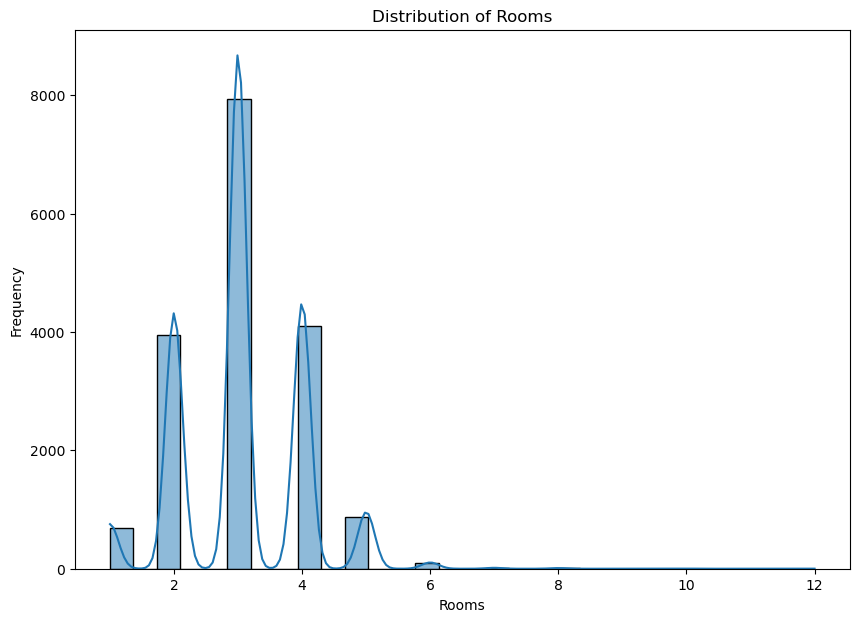

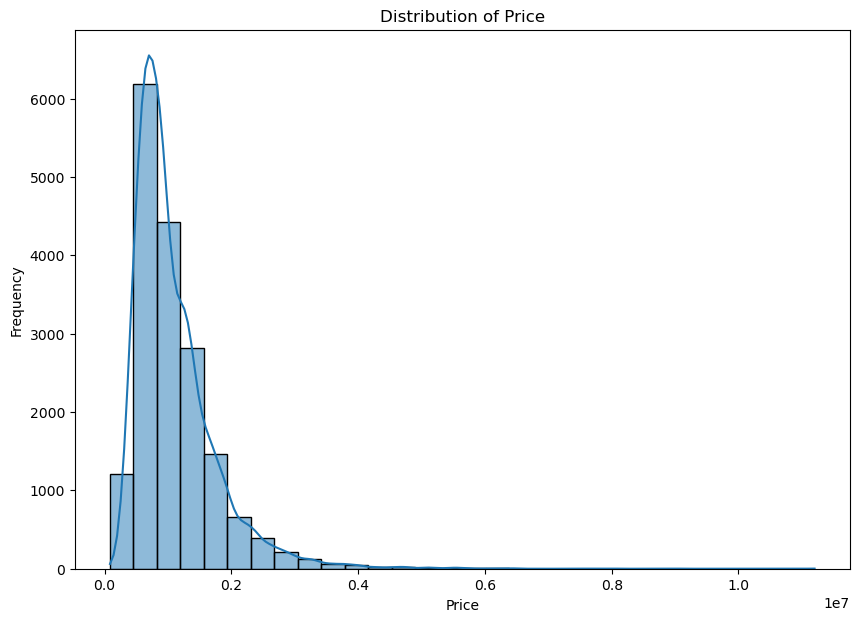

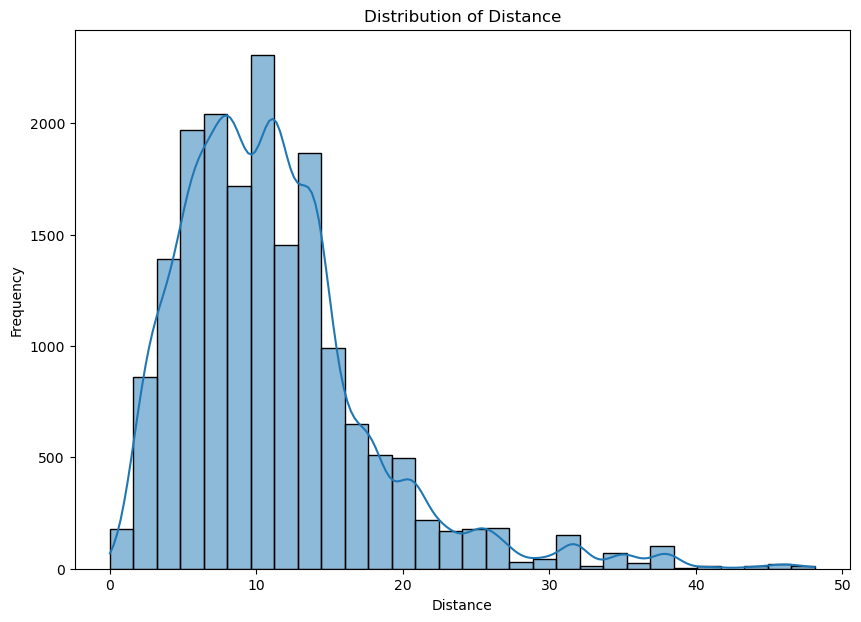

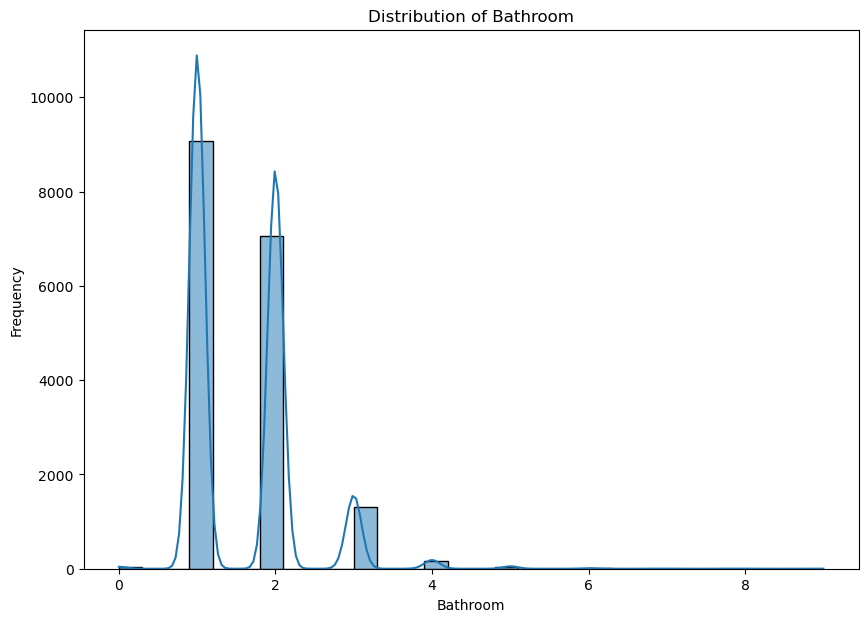

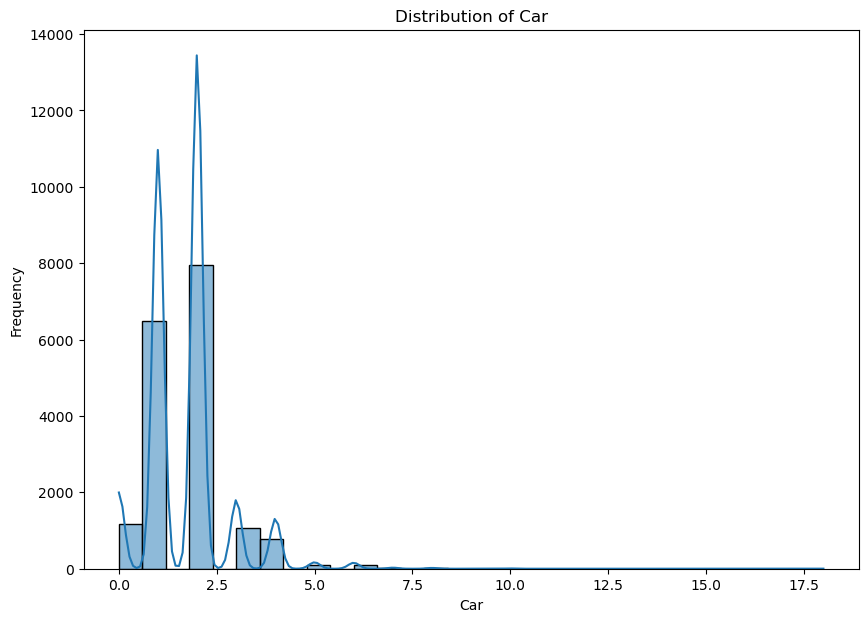

KeyError: 'Land Size'

<Figure size 1000x700 with 0 Axes>

In [13]:
# List of numerical columns
numerical_cols = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landize', 'Property Count', 'Year']

for col in numerical_cols:
    # Set up the figure size
    plt.figure(figsize=(10, 7))
    
    # Plot histogram for the current feature
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Save the figure as a separate image
    plt.savefig(f'../EDA_Output/data_distribution_{col}.jpg')
    plt.show()

- **Rooms**: Most properties have between 2 to 4 rooms.
- **Price**: The distribution is right-skewed, meaning most properties are priced at the lower end with a few properties at the higher price range.
- **Distance**: Most properties are located within 20 km from the city center, with a peak around 5-10 km.
- **Bathroom**: The majority of properties have 1 or 2 bathrooms.
- **Car**: Most properties can accommodate 1 or 2 cars, though there are properties that can accommodate more.
- **Land Size**: The distribution is right-skewed. Most properties have a land size less than 1000 sq.m, but there are a few with larger land sizes.
- **Property Count**: A wide range of property counts, with some peaks observed.
- **Year**: Most of the properties in the dataset are from around the year 2016-2018.

## Categorical Data Analysis

In [ ]:
# Let's investigate the unique values and counts for the categorical features
# Categorical features analysis
categorical_cols = ['Type', 'Region']

# Get unique values and their counts for categorical features
categorical_counts = {}
for col in categorical_cols:
    categorical_counts[col] = df[col].value_counts()

categorical_counts

**The distribution of the categorical features is as follows:**

- **Type**:
  - **House (h)**: 13,351
  - **Unit (u)**: 3,049
  - **Townhouse (t)**: 1,298
- **Region**:
  - **Southern Metropolitan**: 5,530
  - **Northern Metropolitan**: 5,060
  - **Western Metropolitan**: 3,936
  - **Eastern Metropolitan**: 2,111
  - **South-Eastern Metropolitan**: 789
  - **Eastern Victoria**: 105
  - **Northern Victoria**: 104
  - **Western Victoria**: 63

From the data, we can see that houses are the most common property type. Additionally, the **Southern Metropolitan** and **Northern Metropolitan** regions have the highest number of properties.

## Correlation Analysis

In [ ]:
# Compute the correlation analysis
corr = df.corr()

# Extract correlation values with 'Price'
corr_price = corr['Price'].drop('Price', axis=0)

# Sort the values
corr_price = corr_price.sort_values()

# Plot
plt.figure(figsize=(10, 7))
corr_price.plot(kind='barh', color='skyblue')
plt.title("Correlation with Price")
plt.xlabel("Correlation Value")
plt.ylabel("Variables")
plt.savefig('../EDA_Output/features_correlation_with_price.jpg')
plt.show()

In [ ]:
# Base on the correlation analysis we are dropping columns that are close to 0
df.drop(['Postcode',
         'Year',
         'Land Size',
         'Property Count'], axis=1, inplace=True)
df

**This visualization provides a clear picture of how each variable is related to the property price:**

- **Rooms**, **Bathroom**, and **Car** have positive correlations with the price, suggesting that as their values increase, the property price tends to increase as well. Among them, the number of **Rooms** has the strongest positive correlation with price.
- **Distance** has a negative correlation with the price, suggesting that properties closer to the city center might be priced higher.
- **Year**, **Land Size**, **Postcode**, and **Property Count** have weaker correlations with the price.

## Visualizations

In [ ]:
# Visualize some relationships using scatter plots and box plots to get a clearer understanding
# Set up the figure size
plt.figure(figsize=(20, 15))

# Scatter plot for Price vs. Distance
plt.figure(figsize=(20, 15))
sns.scatterplot(x='Distance', y='Price', data=df, alpha=0.5)
plt.title('Price vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.savefig('../EDA_Output/price_vs_distance.jpg')
plt.show()

# Box plot for Price vs. Type
plt.figure(figsize=(20, 15))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.savefig('../EDA_Output/price_distribution_by_type.jpg')
plt.show()

# Box plot for Price vs. Region
plt.figure(figsize=(20, 15))
sns.boxplot(x='Region', y='Price', data=df)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.savefig('../EDA_Output/price_distribution_by_region.jpg')
plt.show()

**The visualizations provide some insights into the relationships between different features and the property price:**

- **Price vs. Distance**:
  - There's a general trend indicating that properties closer to the city center are priced higher. However, there are still many high-priced properties located farther from the city center, likely influenced by other factors like property type, amenities, etc.
  
- **Price Distribution by Type**:
  - Houses (h) tend to have a wider price range compared to units (u) and townhouses (t).
  - The median price for houses is higher than that of units but somewhat comparable to townhouses.
  
- **Price Distribution by Region**:
  - The Southern Metropolitan region tends to have the highest median property price, followed by the Eastern Metropolitan region.
  - Other regions like Northern Victoria and Western Victoria have lower median prices.

## Analyzing the Target Variable: Price

We'll visualize the distribution of the `Price` feature and apply a log transformation to check if it results in a more normal distribution.

In [ ]:
# Histogram with KDE
plt.figure(figsize=(18, 6))
sns.histplot(df['Price'], color='skyblue', bins=30, kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('../EDA_Output/price_feature_distribution_histogram.jpg')
plt.show()

# Box Plot
plt.figure(figsize=(18, 6))
sns.boxplot(x=df['Price'], color='lightcoral')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.savefig('../EDA_Output/price_feature_distribution_boxplot.jpg')
plt.show()

In [ ]:
# Applying log transformation to 'Price' and visualizing the distribution
df['Log_Price'] = np.log1p(df['Price'])

# Histogram for Log Transformed Price
plt.figure(figsize=(18, 6))
sns.histplot(df['Log_Price'], color='skyblue', bins=30, kde=True)
plt.title('Histogram of Log Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.savefig('../EDA_Output/log_price_feature_distribution_histogram.jpg')
plt.show()

# Box Plot for Log Transformed Price
plt.figure(figsize=(18, 6))
sns.boxplot(x=df['Log_Price'], color='lightcoral')
plt.title('Box Plot of Log Transformed Price')
plt.xlabel('Log(Price)')
plt.savefig('../EDA_Output/log_price_feature_distribution_boxplot.jpg')
plt.show()

In [ ]:
# Save DataFrame as csv
df.to_csv('../Cleaned_Data_LogPrice.csv', index = False)